# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import numpy as np
import math
#import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.shape

(4870, 65)

In [6]:
data.shape[0]

4870

In [7]:
data.race.value_counts()

b    2435
w    2435
Name: race, dtype: int64

In [8]:
mask_b = data['race'] == 'b'
mask_w = data['race'] == 'w'
black = data[mask_b]
white = data[mask_w]
black.race.value_counts()

b    2435
Name: race, dtype: int64

In [9]:
white.race.value_counts()

w    2435
Name: race, dtype: int64

In [10]:
print('For White:')
print(white.call.value_counts())
print()
print('For Black:')
print(black.call.value_counts())
print()

For White:
0.0    2200
1.0     235
Name: call, dtype: int64

For Black:
0.0    2278
1.0     157
Name: call, dtype: int64



In [11]:
#print(data.groupby('race').call)
grouped = data.groupby('race')

for name,group in grouped:
    #print(name)
    print(group.call.sum())
    print(grouped.call.std())
    print()

157.0
race
b    0.245650
w    0.295349
Name: call, dtype: float32

235.0
race
b    0.245650
w    0.295349
Name: call, dtype: float32



<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## Question 1

## The Z-test of proportions is a good test to study whether race has a significant impact on the rate of callbacks for resumes.

## The Central Limit Theorem can be applied in this exercise. A distribution of many boostrap sampling replicates, ~10,000, of the proportion difference between the two groups has a Normal Distribution. 

## Question 2

## The Null Hypothesis is that the proportion of callbacks for people with black-sounding or white-sounding names is the same. The Alternate Hypothesis is the there is a difference in callback proportions for the two groups.

In [12]:
w = data[data.race=='w']
b = data[data.race=='b']

In [13]:
len(w)

2435

In [14]:
w.military.value_counts()

0    2210
1     225
Name: military, dtype: int64

In [15]:
b.military.value_counts()

0    2187
1     248
Name: military, dtype: int64

In [16]:
len(b)

2435

In [17]:
w[w.call == 1].call.value_counts()
w_callback = w[w.call == 1].call.sum()
w_callback
w_nocall = len(w) -  w_callback
w_nocall
callback_percent_w = w_callback/len(w)
callback_percent_w

0.096509240246406572

In [18]:
b[b.call == 1].call.value_counts()
b_callback = b[b.call == 1].call.sum()
b_callback
b_nocall = len(b) -  b_callback
b_nocall
callback_percent_b = b_callback/len(b)
callback_percent_b

0.064476386036960986

In [19]:
empirical_prop_diff = callback_percent_w - callback_percent_b
empirical_prop_diff

0.032032854209445585

In [20]:
callback_all = data[data.call == 1].call.sum()
callback_all

392.0

## Question 3

In [21]:
#callback_all = data[data.call == 1].call.value_counts()
print(w_callback)
print(b_callback)
print(data.shape[0])
callback_percentage_all = (w_callback + b_callback)/data.shape[0]
print(callback_percentage_all)
print()
print(callback_percentage_all)

235.0
157.0
4870
0.0804928131417

0.0804928131417


In [22]:
pw = np.sum(w[w.call == 1].call)/len(w)
pb = np.sum(b[b.call == 1].call)/len(b)  

empirical_prop_diff = pw - pb
print(empirical_prop_diff)

0.0320328542094


## Bootstraping Method

In [23]:

bs_sample_b = np.random.choice(b.call,replace = True,size = 100)
bs_sample_w = np.random.choice(w.call,replace = True,size = 100)

bs_sample_b   

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [24]:
np.sum(bs_sample_b == 1)/len(bs_sample_b)

0.070000000000000007

In [25]:
np.sum(bs_sample_b == 1)

7

In [26]:
np.sum(bs_sample_w == 1)/len(bs_sample_w)

0.16

In [27]:
np.sum(bs_sample_w == 1)

16

In [28]:
abs( np.sum(bs_sample_w == 1)/len(bs_sample_w) - np.sum(bs_sample_b == 1)/len(bs_sample_b))

0.089999999999999997

In [29]:
print(np.sum(w[w.call == 1].call)/len(w))
print(np.sum(b[b.call == 1].call)/len(b))

0.0965092402464
0.064476386037


In [30]:
sizeB = 10000
cb_b = np.empty(sizeB)
cb_w = np.empty(sizeB)
diff = np.empty(sizeB)

for idx in range(sizeB):
    bs_sample_b = np.random.choice(b.call,replace = True,size = 100)
    bs_sample_w = np.random.choice(w.call,replace = True,size = 100)
    #bs_sample_b = np.random.choice(b.call,replace = False,size = 100)
    #bs_sample_w = np.random.choice(w.call,replace = False,size = 100)
    prop_w = np.sum(bs_sample_w == 1)/len(bs_sample_w)
    prop_b = np.sum(bs_sample_b == 1)/len(bs_sample_b) 
    cb_b[idx] = prop_b
    cb_w[idx] = prop_w
    #diff[idx] = abs(prop_w - prop_b)
    diff[idx] = (prop_w - prop_b)
    

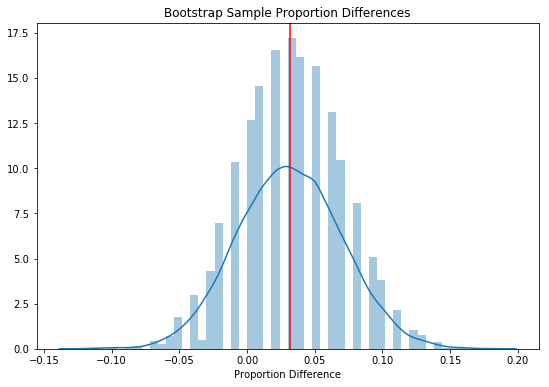

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(diff)
plt.title('Bootstrap Sample Proportion Differences')
plt.axvline(x=empirical_prop_diff,color ='red')
plt.xlabel('Proportion Difference')

In [32]:
print('Black-names callback boostrap mean proportion:')
print(np.mean(cb_b))
print()
print('White-names callback boostrap mean proportion:')
print(np.mean(cb_w))
print()
print('Calculated Difference Bootstrap Mean Difference:')
print(np.mean(diff))
print()
print('Observed Difference in Proportions:')
print(empirical_prop_diff)
print()

Black-names callback boostrap mean proportion:
0.064291

White-names callback boostrap mean proportion:
0.095853

Calculated Difference Bootstrap Mean Difference:
0.031562

Observed Difference in Proportions:
0.0320328542094



In [33]:
# p value for boostrap replicates
# Compute and print the p-value: p
p = np.sum(diff >= empirical_prop_diff ) / len(diff)
print('p-val =', p)

p-val = 0.4617


## Using Bootstrap sampling, the 95% Confidence Level is Between 0.017  &  0.047 for the proportion difference between the two groups as shown in the analysis below. The margin of error for 95% confidence level is 0.0075. And, the p-value for the observed difference in proportions between the two groups is 0.47 using the bootstrap analysis.

In [34]:
std_error = np.std(diff)
std_error

0.038482465565501382

In [35]:
sample_size = 100
sigma = np.std(diff)/math.sqrt(sample_size)  # Standard deviation estimate
print(sigma)

0.00384824655655


In [36]:
z_critical = 1.96
print('z critical value:')
print(z_critical)
print('margin of error for 95% confidence level:')
margin_of_error = z_critical * sigma
print(margin_of_error)
print()

z critical value:
1.96
margin of error for 95% confidence level:
0.00754256325084



In [37]:
#bs_stat = np.mean(cb_w) - np.mean(cb_b)
bs_stat = np.mean(diff)
up_bnd = bs_stat + (1.96*margin_of_error)
#up_bnd = bs_stat + (2*margin_of_error)
low_bnd = bs_stat - (1.96*margin_of_error)
print(up_bnd)
print()
print(low_bnd)
print()
print('Using The Boostrap Method: The 95% Confidence Interval For The Difference In Proportions is:')
print('between ' + str(low_bnd) + ' and ' + str(up_bnd))

0.0463454239716

0.0167785760284

Using The Boostrap Method: The 95% Confidence Interval For The Difference In Proportions is:
between 0.0167785760284 and 0.0463454239716


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## Question 4

In [38]:
# implementation from scratch
# borrowed from https://github.com/Volodymyrk/stats-testing-in-python/blob/master/03%20-%20AB%20testing%20Proportions%20with%20z-test.ipynb
def ztest_proportion_two_samples(x1, n1, x2, n2, one_sided=False):
    p1 = x1/n1
    p2 = x2/n2  
    print('proportion 1:')
    print(p1)
    print()
    print('proportion 2:')
    print(p2)
    print()
    p = (x1+x2)/(n1+n2)
    se = p*(1-p)*(1/n1+1/n2)
    se = np.sqrt(se)
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided # if not one_sided: p *= 2
    return z, p

In [39]:
z,p = ztest_proportion_two_samples(b_callback,len(b) ,w_callback ,len(w), one_sided=False)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

proportion 1:
0.064476386037

proportion 2:
0.0965092402464

 z-stat = -4.108412152434346 
 p-value = 3.983886837577444e-05


## Statsmodel z-test proportion two samples

In [40]:
count = np.array([b_callback,w_callback ])
nobs = np.array([len(b),len(w)])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.6f}'.format(pval))
print(stat)

0.000040
-4.10841215243


## p-value for z-test proportion of two samples is .00004 and z value of -4.1¶

## PERMUTATION SAMPLE: CONCATENATE/COMBINE BOTH GROUPS AND RANDOM SAMPLE A NEW 'BLACK' & 'WHITE' GROUPS. CALCULATE PROPORTION OF BOTH PERMUTATION GROUPS.

In [41]:
permuted_data = np.random.permutation(data.call)

# Split the permuted array into two: perm_sample_1, perm_sample_2
perm_sample_b = permuted_data[0:len(b)]
perm_sample_w = permuted_data[len(b):]
perm_b_callback = np.sum(perm_sample_b[perm_sample_b == 1])
print(np.sum(perm_sample_b[perm_sample_b == 1]))
print(len(perm_sample_b))
print('Percent Callback for Permutation Black sample:')
print(np.sum(perm_sample_b[perm_sample_b == 1])/len(perm_sample_b))
perm_w_callback = np.sum(perm_sample_w[perm_sample_w == 1])
print(np.sum(perm_sample_w[perm_sample_w == 1]))
print(len(perm_sample_w))
print('Percent Callback for Permutation White sample:')
print(np.sum(perm_sample_w[perm_sample_w == 1])/len(perm_sample_w))

197.0
2435
Percent Callback for Permutation Black sample:
0.0809034907598
195.0
2435
Percent Callback for Permutation White sample:
0.0800821355236


In [42]:
z,p = ztest_proportion_two_samples(perm_b_callback,len(perm_sample_b),perm_w_callback,len(perm_sample_w), one_sided=False)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

proportion 1:
0.0809034907598

proportion 2:
0.0800821355236

 z-stat = 0.10534390134447055 
 p-value = 0.9161029285127436


In [43]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[0:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [44]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
       # Generate permutation sample
       perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

       # Compute the test statistic
       perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [45]:
def diff_prop(data_A,data_B):
    prop_A = data_A[data_A == 1].sum()/len(data_A)
    prop_B = data_B[data_B == 1].sum()/len(data_B)
    
    return abs(prop_A - prop_B)

In [46]:
size = 10000
prop_diff2 = np.empty(size)
proportions2 = []

for idx in range(size):
    # Generate permutation samples
    permuted_data = np.random.permutation(data.call)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_b = permuted_data[0:len(b)]
    perm_w = permuted_data[len(b):]
    
    prop_b = perm_b[perm_sample_b == 1].sum()/len(perm_b)
    prop_w = perm_w[perm_sample_w == 1].sum()/len(perm_w)
    #prop_diff2[idx] = abs(prop_b-prop_w)
    prop_diff2[idx] = (prop_b-prop_w)
    proportions2.append((prop_b,prop_w))

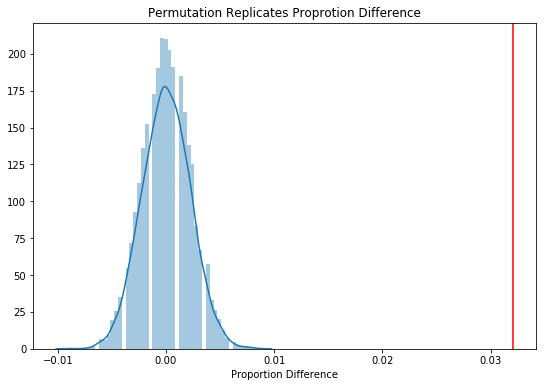

In [47]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(prop_diff2)
plt.title('Permutation Replicates Proprotion Difference')
plt.axvline(x=empirical_prop_diff,color ='red')
plt.xlabel('Proportion Difference')

In [48]:
pw = np.sum(w[w.call == 1].call)/len(w)
pb = np.sum(b[b.call == 1].call)/len(b)  

empirical_prop_diff = pw - pb
print(empirical_prop_diff)

0.0320328542094


In [49]:
# Compute p-value: p
p = float(np.sum(prop_diff2 >= empirical_prop_diff) / len(prop_diff2))

# Print the result
print('p-value =')
print('{0:0.9f}'.format(p))

p-value =
0.000000000


## The permuation analysis shows that the observed difference in proportions between the two groups is very unlikely to be obtained from a permutation replicate sample distribution. Therefore, the null hypothesis that there is no difference in proportion of job interviews for the two groups is rejected.

## The statistical significance of both the z-test of two sample proportions and the permutation sample analysis indicates that there is a statistically significant difference between the two groups. 

## Question 5

## Based on the above analysis which showed that there is a statistically significant difference between the two groups, the name of the candidate was a factor in the likelihood of having a job callback. Given that the resumes submitted to employers are identical except for the name, It appears that a bias DOES indeed exist based on the candidate's name. However, for comparison, I also briefly studied other factors that may have influenced the callback rate of candidates. As shown in the data, there are other characteristics for each candidate such as: gender, military service and education that may be significant that I studied out of curiosity. 

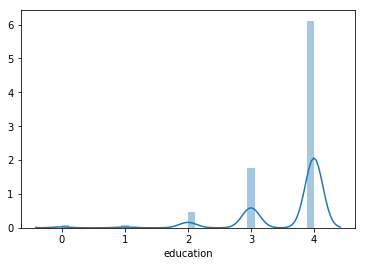

In [50]:
sns.distplot(data.education)

## Observed callback rate for education level of candidates:

In [51]:
edu_0 = data[data.education == 0].call
edu_1 = data[data.education == 1].call
edu_2 = data[data.education == 2].call
edu_3 = data[data.education == 3].call
edu_4 = data[data.education == 4].call

In [52]:
print('The call back for education level 0 is:')
print(np.sum(edu_0 == 1)/len(edu_0))
print()
print('The call back for education level 1 is:')
print(np.sum(edu_1 == 1)/len(edu_1))
print()
print('The call back for education level 2 is:')
print(np.sum(edu_2 == 1)/len(edu_2))
print()
print('The call back for education level 3 is:')
print(np.sum(edu_3 == 1)/len(edu_3))
print()
print('The call back for education level 4 is:')
print(np.sum(edu_4 == 1)/len(edu_4))
print()

The call back for education level 0 is:
0.0652173913043

The call back for education level 1 is:
0.075

The call back for education level 2 is:
0.0912408759124

The call back for education level 3 is:
0.0834990059642

The call back for education level 4 is:
0.0790525114155



In [53]:
edu_0_c = np.sum(edu_0 == 1)
edu_2_c = np.sum(edu_2 == 1)
ztest_proportion_two_samples(edu_0_c,len(edu_0), edu_2_c,len(edu_2), one_sided=False)

proportion 1:
0.0652173913043

proportion 2:
0.0912408759124



(-0.57799514998215673, 0.56326739368421253)

In [54]:
count = np.array([edu_0_c,edu_2_c])
nobs = np.array([len(edu_0),len(edu_2)])
stat, pval = proportions_ztest(count, nobs)
print(pval)

0.563267393684


In [55]:
girl = data[data.sex == "f"].call
boy = data[data.sex == "m"].call
print('The call back for women is:')
print(np.sum(girl == 1)/len(girl))
print()
print('The call back for men is:')
print(np.sum(boy == 1)/len(boy))
print()

The call back for women is:
0.0824879871863

The call back for men is:
0.0738434163701



In [56]:
# statsmodel z-test for proportions
gc = np.sum(girl == 1)
bc = np.sum(boy == 1)
count = np.array([gc,bc])
nobs = np.array([len(girl),len(boy)])
stat, pval = proportions_ztest(count, nobs)
print(pval)

0.35014524574


In [57]:
ztest_proportion_two_samples(gc,len(girl), bc,len(boy), one_sided=False)

proportion 1:
0.0824879871863

proportion 2:
0.0738434163701



(0.93430759876612524, 0.35014524573983241)

In [58]:
mil_0 = data[data.military == 0].call
mil_1 = data[data.military == 1].call
print('The call back for military 1 is:')
print(np.sum(mil_1 == 1)/len(mil_1))
print()
print('The call back for military 0 is:')
print(np.sum(mil_0 == 1)/len(mil_0))
print()

The call back for military 1 is:
0.0634249471459

The call back for military 0 is:
0.0823288605868



In [59]:
# statsmodel z-test for proportions
mil0_c = np.sum(mil_0 == 1)
mil1_c = np.sum(mil_1 == 1)
count = np.array([mil0_c,mil1_c])
nobs = np.array([len(mil_0),len(mil_1)])
stat, pval = proportions_ztest(count, nobs)
print(stat)
print(pval)

1.43595200938
0.151015997561


In [60]:
ztest_proportion_two_samples(mil0_c,len(mil_0), mil1_c,len(mil_1), one_sided=False)

proportion 1:
0.0823288605868

proportion 2:
0.0634249471459



(1.4359520093772888, 0.15101599756096618)

## Based on the above brief analysis, gender, military service & education level does NOT appear to be a significant factor in job callbacks.